In [27]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import nltk 
from nltk.stem.porter import PorterStemmer 
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\parim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
!pip install wordcloud


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\parim\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

In [30]:
#Load the data 
amazon_alexa_df = pd.read_csv(r"C:\Users\parim\Downloads\train.ft.txt.bz2\amazon_alexa.tsv", delimiter='\t', quoting=3)
print(f"Dataset shape: {amazon_alexa_df.shape}")

Dataset shape: (3150, 5)


In [31]:
amazon_alexa_df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [32]:
#Column names 
print(f"Features names: {amazon_alexa_df.columns.values}")

Features names: ['rating' 'date' 'variation' 'verified_reviews' 'feedback']


In [33]:
#Checking null values 
amazon_alexa_df.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [34]:
amazon_alexa_df[amazon_alexa_df["verified_reviews"].isna() == True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [35]:
#Drop the null record 
amazon_alexa_df.dropna(inplace=True)

In [36]:
print(f"Dataset shape after dropping null values: {amazon_alexa_df.shape}")

Dataset shape after dropping null values: (3149, 5)


In [37]:
amazon_alexa_df['length'] = amazon_alexa_df['verified_reviews'].apply(len)

In [38]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [40]:
print(f"'verified_reviews' column value: {amazon_alexa_df.iloc[10]['verified_reviews']}") #Original value
print(f"Length of review: {len(amazon_alexa_df.iloc[10]['verified_reviews'])}") 
print(f"'length' column value: {amazon_alexa_df.iloc[10]['length']}") #Value of column 'length'

'verified_reviews' column value: "I sent it to my 85 year old Dad, and he talks to it constantly."
Length of review: 65
'length' column value: 65


In [41]:
amazon_alexa_df.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

In [44]:
len(amazon_alexa_df)

3149

In [43]:
#Distinct values of "rating" and its count 
print(f"Rating value count: \n{data['rating'].value_counts()}")

Rating value count: 
rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64


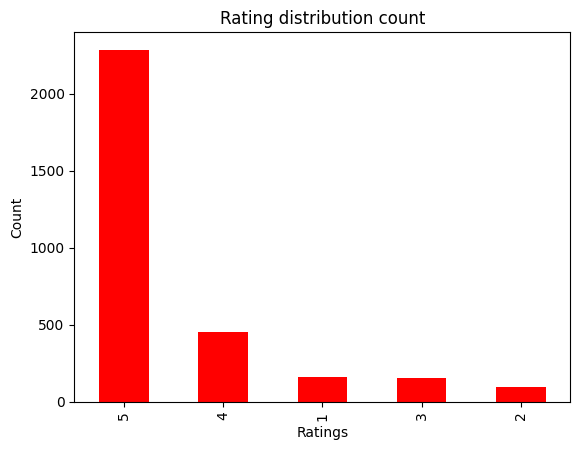

In [48]:
#Bar plot 
amazon_alexa_df['rating'].value_counts().plot.bar(color = 'red')
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()


In [ ]:
#Finding percentage distribution of each rating 
print(f"Rating value count - percentage distribution: \n{round(amazon_alexa_df['rating'].value_counts()/amazon_alexa_df.shape[0]*100,2)}")

In [45]:
#Distinct values of 'feedback' and its count 
print(f"Feedback value count: \n{amazon_alexa_df['feedback'].value_counts()}")

Feedback value count: 
feedback
1    2893
0     256
Name: count, dtype: int64


In [46]:
amazon_review_0 = amazon_alexa_df[amazon_alexa_df['feedback'] == 0].iloc[1]['verified_reviews']
print(amazon_review_0)

Sound is terrible if u want good music too get a bose


In [47]:
amazon_review_1 = amazon_alexa_df[amazon_alexa_df['feedback']==1].iloc[1]['verified_reviews']
print(amazon_review_1)

Loved it!
